In [61]:
import os
import json
import chainer
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [62]:
def list2ndarray(l):
    result = []
    for d in l:
        epoch = d["epoch"]
        acc = d["main/accuracy"]
        val_acc = d["validation/main/accuracy"]
        loss = d["main/loss"]
        val_loss = d["validation/main/loss"]
        result.append([epoch, loss, val_loss, acc, val_acc])
    return np.array(result)

In [63]:
BASE_DIR = "./log"

In [64]:
log_files = glob(os.path.join(BASE_DIR, "*/log"))

In [65]:
result = {}

for path in log_files:

    with open(path, "r") as f:
        l = json.load(f)

    opt_str = path.split("/")[-2]

    tmp = list2ndarray(l)

    result.update({opt_str: tmp})

loss plot


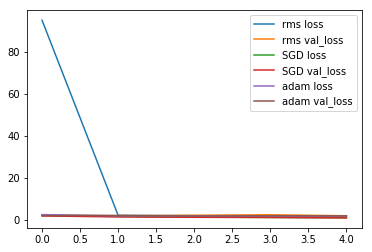

acc plot


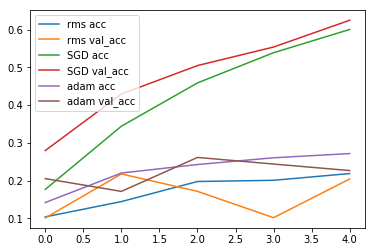

In [66]:
legend = []
print("loss plot")
for key in result.keys():
    data = result[key]
    plt.plot(data[:, 1])
    plt.plot(data[:, 2])
    legend.extend(["{0} loss".format(key), "{0} val_loss".format(key)])
plt.legend(legend)
plt.show()
plt.close()

legend = []
print("acc plot")
for key in result.keys():
    data = result[key]
    plt.plot(data[:, 3])
    plt.plot(data[:, 4])
    legend.extend(["{0} acc".format(key), "{0} val_acc".format(key)])
plt.legend(legend)
plt.show()
plt.close()